In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

mid_price_change_folder = 'data\\20241021_BTC_USD_mid_ask_bid_price_change\\simulations'
mid_price_subchanges_folder = 'data\\simulations\\multivariate_hawkes\\BTC_USD'

In [3]:
dfs = []
for file in os.listdir(mid_price_change_folder):
    if file.endswith('.tsv'):
        df = pd.read_csv(os.path.join(mid_price_change_folder, file), sep='\t')
        df['error'] = (df['real'] - df['predicted']).abs()
        df['file'] = file
        dfs.append(
            df
        )

mid_price_change_df = pd.concat(dfs, ignore_index=True)
mid_price_change_df['type'] = 'change'

dfs = []
for file in os.listdir(mid_price_subchanges_folder):
    if file.endswith('.tsv'):
        df = pd.read_csv(os.path.join(mid_price_subchanges_folder, file), sep='\t')
        df['error'] = (df['real'] - df['predicted']).abs()
        df['file'] = file
        dfs.append(
            df
        )

mid_price_subchanges_df = pd.concat(dfs, ignore_index=True)
mid_price_subchanges_df['type'] = 'subchange'
changes_df = pd.concat([mid_price_change_df, mid_price_subchanges_df], ignore_index=True)
changes_df.head()

,real,predicted,error,file,type
0,0.267,2.804238,2.537238,orderbook_changes_1705074061033_1705072791.tsv,change
1,0.269,2.853134,2.584134,orderbook_changes_1705074061033_1705072791.tsv,change
2,0.497,3.990219,3.493219,orderbook_changes_1705074061033_1705072791.tsv,change
3,0.499,4.510241,4.011241,orderbook_changes_1705074061033_1705072791.tsv,change
4,0.721,3.397462,2.676462,orderbook_changes_1705074061033_1705072791.tsv,change


(0.0, 5.0)

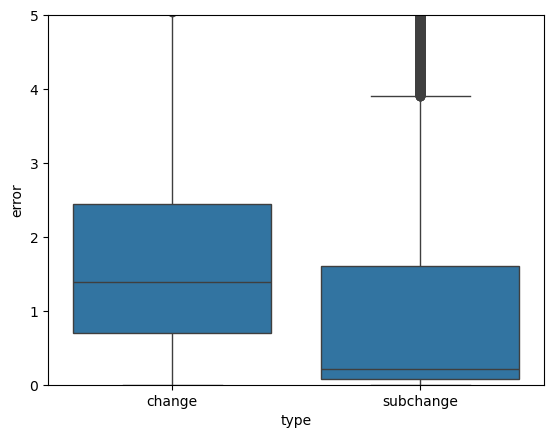

In [5]:
sns.boxplot(x='type', y='error', data=changes_df)
plt.ylim(0,5)

In [15]:
changes_df[changes_df['error'] > 120]

,real,predicted,error,file,type
6274,163.226,300.52,137.294,orderbook_changes_1705496790339_1705492398.tsv,change
6275,163.226,300.52,137.294,orderbook_changes_1705496790339_1705492398.tsv,change
6276,163.447,300.52,137.073,orderbook_changes_1705496790339_1705492398.tsv,change
6277,163.677,300.52,136.843,orderbook_changes_1705496790339_1705492398.tsv,change
6278,163.677,300.52,136.843,orderbook_changes_1705496790339_1705492398.tsv,change
...,...,...,...,...,...
25939,29.625,150.52,120.895,orderbook_changes_1705496790339_1705492398.tsv,subchange
25940,29.861,150.52,120.659,orderbook_changes_1705496790339_1705492398.tsv,subchange
25941,30.073,150.52,120.447,orderbook_changes_1705496790339_1705492398.tsv,subchange
25942,30.286,150.52,120.234,orderbook_changes_1705496790339_1705492398.tsv,subchange
